<a href="https://colab.research.google.com/github/manojmandal27/linear_regression/blob/main/Student_performance_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib as matlab
import statsmodels
import seaborn as sns
import matplotlib.pyplot as plt

# Data

In [2]:
!wget https://github.com/manojmandal27/linear_regression/raw/main/Student_Performance.zip
!unzip Student_Performance.zip
performance = pd.read_csv("Student_Performance.csv")
performance.info()

--2024-07-25 15:56:17--  https://github.com/manojmandal27/linear_regression/raw/main/Student_Performance.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/manojmandal27/linear_regression/main/Student_Performance.zip [following]
--2024-07-25 15:56:18--  https://raw.githubusercontent.com/manojmandal27/linear_regression/main/Student_Performance.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49694 (49K) [application/zip]
Saving to: ‘Student_Performance.zip’

Student_Performance 100%[===================>]  48.53K  --.-KB/s    in 0.04s   

2024-07-25 15:56:18 (1.18 MB/s) - ‘Student_Performanc

# Correlation

In [5]:
np.corrcoef(performance["Performance Index"], performance["Hours Studied"])

array([[1.        , 0.37373035],
       [0.37373035, 1.        ]])

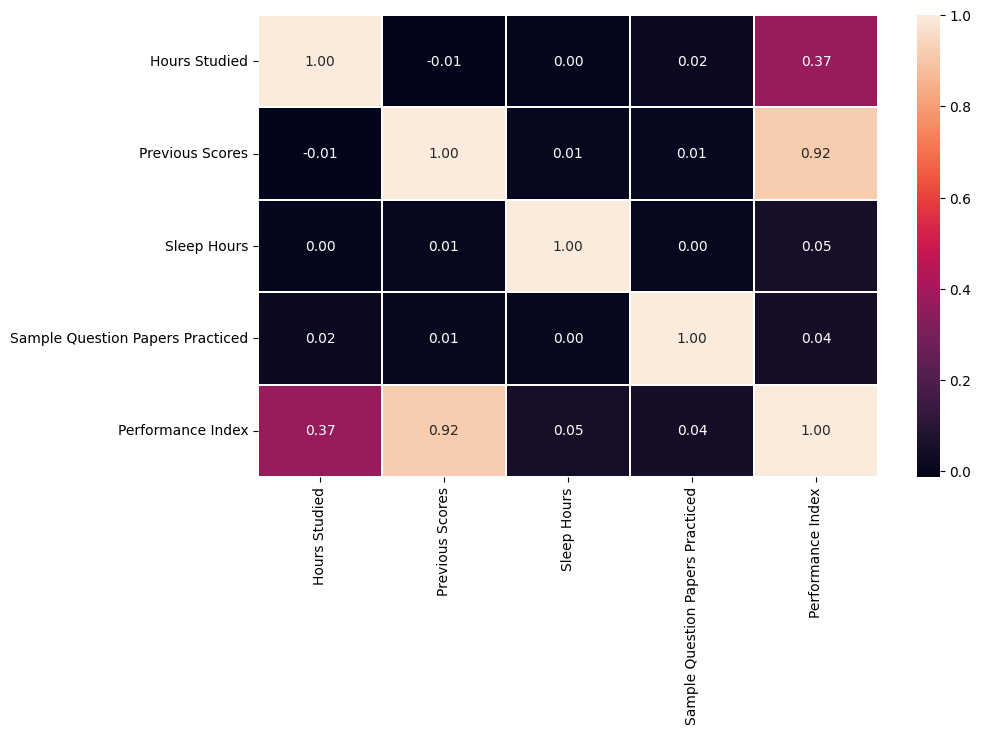

In [8]:
# first visualize correlation matrix between numerical columns

plt.figure(figsize = (10,6))
sns.heatmap(performance.select_dtypes(exclude = object).corr(), annot = True, fmt = ".2f", linewidths = 0.2)
plt.show()

# Regression

In [23]:
performance = pd.DataFrame(performance)

In [24]:
performance.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [36]:
# import libraries to model

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score

In [39]:
# create object from labelencoder

encoder = LabelEncoder()

performance["Extracurricular Activities"] =  encoder.fit_transform(performance["Extracurricular Activities"])

In [42]:
# see sample of data

performance.sample(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
8981,6,79,0,6,9,70.0
2693,6,79,0,6,9,68.0
8852,7,54,0,6,7,44.0
6822,5,62,1,7,0,45.0
1452,9,75,1,6,7,73.0


In [43]:
# Splitting data into Indipendent and Dependent Variable

Train = performance.drop(columns = "Performance Index")
Target = performance["Performance Index"]

In [44]:
# see sample of train data

Train.sample(3)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
9027,3,85,0,8,0
1695,5,83,1,7,0
6855,8,65,1,7,1


In [45]:
# see sample of target label

Target

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

In [46]:
X_train, X_test, y_train, y_test = train_test_split(Train, Target, test_size = 0.2, random_state = 42)

In [47]:
# see shape of splited data

print("x_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (8000, 5)
y_train shape:  (8000,)
x_test shape:  (2000, 5)
y_test shape:  (2000,)


# Modeling

In [48]:
# create object from RandomForestRegressor

model = LinearRegression()

In [49]:
# fit model

model.fit(X_train,y_train)

LinearRegression()

# Evaluating Results

In [50]:
# Calculate the score of the model on the training data

model.score(X_train, y_train)

0.9886898790682355

In [51]:
# see predicted values

predict = np.round(model.predict(X_test), decimals = 1)

In [52]:
# Real Values vs Predicted Values

pd.DataFrame({"Actual Performance" : y_test, "Predicted Performance" : predict})

,Actual Performance,Predicted Performance
6252,51.0,54.7
4684,20.0,22.6
1731,46.0,47.9
4742,28.0,31.3
4521,41.0,43.0
...,...,...
6412,45.0,46.9
8285,66.0,62.7
7853,16.0,16.8
1095,65.0,63.3


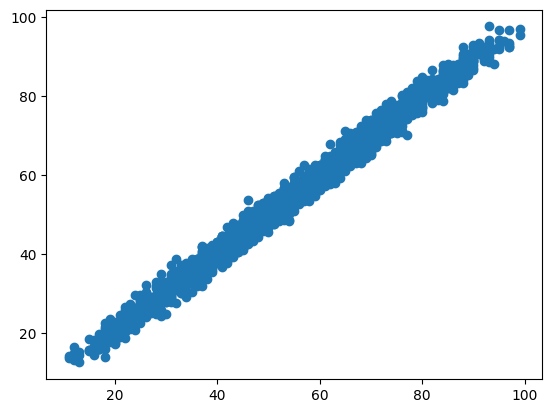

In [53]:
# Create scatter plot to see distribution

plt.scatter(y_test, predict)
plt.show()

In [54]:
# see mean absolute error

mean_absolute_error(y_test,predict)

1.612

In [55]:
# see score

r2_score(y_test,predict)

0.9889704960519785

In [56]:
# see coefficients values

model.coef_

array([2.85248393, 1.0169882 , 0.60861668, 0.47694148, 0.19183144])

In [57]:
# see y intercept

model.intercept_

-33.92194621555638

Equation of our multiple linear regression model is :

2.85 × Hours Studied + 1.02 × Previous Scores + 0.61 × Extracurricular Activities + 0.48 × Sleep Hours + 0.19 × Sample Question Papers Practiced - 33.92